# Introduction to Scikit-Learn (skLearn)

this note book demonstrates some of the most useful functions of 
the beautiful scikit-Learn Library.

What we are going to cover:
 0. An end-to-end Scikit-Learn workflow
 1. Getting the data ready
 2. Choose the right estimator/algorithm for our problems
 3. Fit the model/algorithm and use it to make predictions on our data
 4. Evaluating a model.
 5. Improve a model
 6. Save and load a trained model
 7. Putting it all together!

In [1]:
what_were_covering=["0. An end-to-end Scikit-Learn workflow",
 " 1. Getting the data ready",
 " 2. Choose the right estimator/algorithm for our problems",
 " 3. Fit the model/algorithm and use it to make predictions on our data",
 " 4. Evaluating a model.",
 " 5. Improve a model",
 " 6. Save and load a trained model",
 " 7. Putting it all together!"]

## 0. An end to end Scikit-Learn Workflow.

In [2]:
# 1. Get the data ready
import pandas as pd
import numpy as np
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
import warnings

#warnings.filterwarnings("ignore") to igonre the warning.


In [4]:
# Create X(Feature matrix)
x=heart_disease.drop("target",axis=1)

# create y(labels)
y=heart_disease["target"]

In [5]:
# Choose the right model and hyperparameters.
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

# We will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



In [7]:
clf.fit(x_train,y_train);

In [8]:
# make a prediction
y_preds=clf.predict(x_test)
y_preds

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [9]:
# 4. Evaluate the model on the training data and test data.
clf.score(x_train,y_train)

1.0

In [14]:
clf.score(x_test,y_test)

0.8032786885245902

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [16]:
confusion_matrix(y_test,y_preds) 

array([[21,  7],
       [ 5, 28]], dtype=int64)

In [17]:
accuracy_score(y_test,y_preds)

0.8032786885245902

In [18]:
# 5. Improve a model 
# try different amount of n_estimators
np.random.seed(42)
for i in range (10,100,10):
    print(f"trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set:{clf.score(x_test,y_test)*100 :.2f}%")
    print("  ")

trying model with 10 estimators...
Model accuracy on test set:85.25%
  
trying model with 20 estimators...
Model accuracy on test set:77.05%
  
trying model with 30 estimators...
Model accuracy on test set:77.05%
  
trying model with 40 estimators...
Model accuracy on test set:77.05%
  
trying model with 50 estimators...
Model accuracy on test set:78.69%
  
trying model with 60 estimators...
Model accuracy on test set:75.41%
  
trying model with 70 estimators...
Model accuracy on test set:81.97%
  
trying model with 80 estimators...
Model accuracy on test set:81.97%
  
trying model with 90 estimators...
Model accuracy on test set:80.33%
  


In [19]:
# save the model and load it 
import pickle

pickle.dump(clf,open("random_forest_model1.pk1","wb"))

In [20]:
loaded_model=pickle.load(open("random_forest_model1.pk1","rb"))
loaded_model.score(x_test,y_test)

0.8032786885245902

In [21]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 ' 1. Getting the data ready',
 ' 2. Choose the right estimator/algorithm for our problems',
 ' 3. Fit the model/algorithm and use it to make predictions on our data',
 ' 4. Evaluating a model.',
 ' 5. Improve a model',
 ' 6. Save and load a trained model',
 ' 7. Putting it all together!']

In [22]:
# Standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Getting data ready to used with the machine learnig
 
    Three main things to do :
        1. split the data into features and label(usually "x" and "y")
        2. filling (also called imputing) or disregarding  missing values
        3. convert non-numerical values into numerical values(also called feature encoding)

In [23]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

In [25]:
# splitting the data into training and test sets
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.3)

In [26]:
x_train.shape,y_train.shape

((212, 13), (91, 13))

In [27]:
len(heart_disease)

303

### 1.1 make sure it's all numeric.
lets take another data set to use it.

In [28]:
car_sales=pd.read_csv("car-sales-missing.csv")

In [29]:
car_sales.dropna(inplace=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
9,Honda,Blue,51029.0,4.0,26683.0
10,Nissan,White,167421.0,4.0,16259.0
11,Nissan,Green,17119.0,4.0,6160.0


In [30]:
# split the data into x and y
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]


In [31]:
# split into training and test set
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.3)

In [32]:
# building the machine learning model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'Honda'

## How to convert into numerical

In [33]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
One_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",One_hot,categorical_features)],remainder="passthrough")

transformedX=transformer.fit_transform(x)
transformedX


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [34]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [35]:
transformed_x=pd.DataFrame(transformedX)

In [42]:
# another way to transform the data into numerical
dummies=pd.get_dummies(car_sales[["Make","Colour"]])
merged = pd.concat([car_sales, dummies], axis='columns')
merged = merged.drop(["Make","Colour","Price"],axis="columns")
merged.head()

,Odometer (KM),Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,35431.0,4.0,0,1,0,0,0,0,0,0,1
1,192714.0,5.0,1,0,0,0,0,1,0,0,0
2,84714.0,4.0,0,1,0,0,0,0,0,0,1
3,154365.0,4.0,0,0,0,1,0,0,0,0,1
4,181577.0,3.0,0,0,1,0,0,1,0,0,0


In [46]:
# Let's refit the data into the model
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.31422608913921635

In [47]:
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(merged,y,test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.3033540825062042

### what happen if missing values

1. fill them with some value(also known as imputation).
2. Remove the sample data.


In [51]:
# Import car Sale missing data 
car_sales_missing=pd.read_csv("car-sales-missing.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### option 1 Fill missing data with pandas

In [54]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)

# Fill the " Odometer Column"
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# fill the doors
car_sales_missing["Doors"].fillna(4,inplace=True)

In [55]:
# check out our data frame for missing value again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [56]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [57]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [58]:
len(car_sales_missing)

950

In [59]:
x= car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [66]:
# Convert categorical data into numerical data
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
One_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",One_hot,categorical_features)],remainder="passthrough")

transformedX=transformer.fit_transform(car_sales_missing)
transformedX=pd.DataFrame(transformedX)
transformedX

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.000000,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.000000,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.000000,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.000000,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.000000,14043.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,42652.000000,23883.0
6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,163453.000000,8473.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,131253.237895,20306.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,130538.000000,9374.0
9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,51029.000000,26683.0


### Option 2 fill the missing values with scikit-Learn 

In [68]:
car_missing=pd.read_csv("car-sales-missing.csv")
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [69]:
car_missing.dropna(subset=["Price"],inplace=True)
car_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [70]:
# Split into x and y
x=car_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [72]:
# fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with "missing" and Numerical with mean
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

# Define columns
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

# Create an imputer (something that fill missing data)
imputer=ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

# Tranform the data
filledx=imputer.fit_transform(x)
filledx

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [73]:
car_sales_filled=pd.DataFrame(filledx,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [74]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [75]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
One_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",One_hot,categorical_features)],remainder="passthrough")

transformedX=transformer.fit_transform(car_sales_filled)
transformedX


<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [79]:
# now we got our data as number and filled (no missing value)
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(transformedX,y,test_size=0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

### 2. Choose the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm

1. Classification- predicting whether a sample is one thing or another thing.
2. Regression- predicting a number


### 2.1  Picking a machine Learning model for a regression problem

In [83]:
# Import Boston housing Dataset form sklearn library.
from sklearn.datasets import load_boston
boston=load_boston()
boston;

In [84]:
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [85]:
# How many samples?
len(boston_df)

506

In [86]:
# let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# create the data 
x=boston_df.drop("target",axis=1)
y=boston_df["target"]

# split into train and test set

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

# Instantiate Ridge model
model=Ridge()
model.fit(x_train,y_train)

# check the score of the ridge model on the test data

model.score(x_test,y_test)



0.6662221670168522

# How to improve this score??
what if Ridge is not working?

In [94]:
# Let's try the random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor

# Setup ranodm seed
np.random.seed(42)

# Create the data
x=boston_df.drop("target",axis=1)
y=boston_df["target"]

# Split the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#  Intaitiate the random Forest Regressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

# Evaluating the Random Forest Regressor
rf.score(x_test,y_test)

0.873969014117403

### 2.2 Choosing an estimator for classification problem

In [96]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [97]:
len(heart_disease)

303

In [108]:
# import the linearSVC estimator class
from sklearn.svm import LinearSVC 

# Setup random seed
np.random.seed(42)

# make the data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# instantiate LinearSVC
clf=LinearSVC()
clf.fit(x_train,y_train)

# Evaluating the LinearSVC
clf.score(x_test,y_test)


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4918032786885246

In [104]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [109]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# make the data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# instantiate RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

# Evaluating the RandomForestClassifier
clf.score(x_test,y_test)


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8524590163934426

## 3. Fit the model/algorithm on our data and use it to make prediction
# 3.1 Fit the data to the model

In [110]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# make the data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# instantiate RandomForestClassifier
clf=RandomForestClassifier()
# fit the model to the data (training machine learning model)
clf.fit(x_train,y_train)

# Evaluating the RandomForestClassifier( use the pattern learn by model)
clf.score(x_test,y_test)


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8524590163934426

### make prediction using a machine learning model

two ways to make prediction
1.predict()
2.predict_proba()

In [111]:
# use a train mode to make predictions
clf.predict(np.array([1,2,3,4,5,6])) # this doesn't work

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4. 5. 6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [112]:
clf.predict(x_test)


array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [114]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [115]:
# compare prediction to the truth lables to evaluate the mode
y_preds=clf.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [116]:
clf.score(x_test,y_test)

0.8524590163934426

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

# Make prediction with predict_proba()

In [118]:
# predict_proba() return the probablity estimates of each row 
clf.predict_proba(x_test[:5])

array([[0.9, 0.1],
       [0.5, 0.5],
       [0.4, 0.6],
       [0.9, 0.1],
       [0.1, 0.9]])

In [119]:
# lets predict() on the same data...
clf.predict(x_test[:5])

array([0, 0, 1, 0, 1], dtype=int64)

In [120]:
# predict() can also used for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x=boston_df.drop("target",axis=1)
y=boston_df["target"]

# split into training and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate and fit model
model=RandomForestRegressor().fit(x_train,y_train)

# Make prediction 
y_preds=model.predict(x_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [121]:
y_preds[:10]

array([21.85, 34.82, 18.09, 23.21, 17.2 , 21.23, 17.9 , 14.74, 21.6 ,
       21.86])

In [122]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [123]:
# compare the prediction to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)


2.2037254901960788

## 4. Evaluating Machine Learning Model
There is three way to evaluate the Scikit-Learn models/estimators

1. Estimator score method
2. The scoring parameter
3. Problem-specific metric functions

#### 4.1 Evaluating a model with the score method

In [129]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# make the data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# instantiate RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
# fit the model to the data (training machine learning model)
clf.fit(x_train,y_train)

# Evaluating the RandomForestClassifier( use the pattern learn by model)
clf.score(x_test,y_test)
# Return the mean accuracy of th given data


0.8524590163934426

In [125]:
clf.score(x_train,y_train)

1.0

In [128]:
# Lets do for the regressor model
# predict() can also used for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x=boston_df.drop("target",axis=1)
y=boston_df["target"]

# split into training and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate and fit model
model=RandomForestRegressor(n_estimators=100).fit(x_train,y_train)

model.score(x_test,y_test)
# Return the cofficient of determination r^2 of the prediction.

0.873969014117403

### 4.2 Evaluating the model using the scoring parameter
crossvalidation

In [131]:
from sklearn.model_selection import cross_val_score
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# make the data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# instantiate RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
# fit the model to the data (training machine learning model)
clf.fit(x_train,y_train);

In [132]:
clf.score(x_test,y_test)

0.8524590163934426

In [133]:
# cross validation with fold 5
cross_val_score(clf,x,y,cv=5)


array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [134]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.90322581, 0.87096774,
       0.8       , 0.83333333, 0.9       , 0.72413793, 0.79310345])

In [136]:
np.random.seed(42)

# single training and test split score
clf_single_score=clf.score(x_test,y_test)

# Take the mean of 5-fold cross-validation score.
clf_cross_val_score=np.mean(cross_val_score(clf,x,y,cv=5))

# compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [137]:
# scoring parameter set to None by default
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC Curve
3. Confusion matrix
4. Classification report

#### Accuracy

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier(n_estimators=100)
cross_val_score=cross_val_score(clf,x,y,cv=5)

In [141]:
np.mean(cross_val_score)

0.8248087431693989

In [142]:
print(f"Heart Disease Classifier Cross-Validated Accuracy:{np.mean(cross_val_score)*100:2f}%")

Heart Disease Classifier Cross-Validated Accuracy:82.480874%


#### Area under the receiver operating characteristic curve (AUC/ROC) 

* Area under the curve (AUC)
* ROC Curve

ROC curves are a comparison of a model's true positive rate(tpr) versus a model false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 whent truth is 0
* True negative =  model predicts  0 when truth is 0
* false negative = model predicts 0 when truth is 1.


In [144]:
# Create x_test,y_test....etc
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [145]:
from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(x_train,y_train)

# Make prediction with probabilities

y_probs=clf.predict_proba(x_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [152]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]


array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [159]:
# Calculate the fpr,tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

# check the false positive rates
fpr


array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

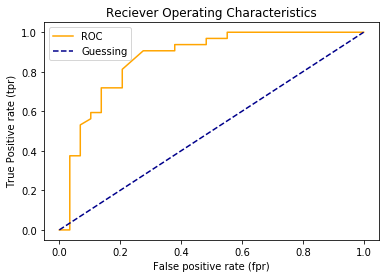

In [166]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    plots a ROC curve given the false positive rate (fpr) and 
    True positive rate (tpr) of a model.
    """
    plt.plot(fpr,tpr,color="orange",label="ROC")

    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")

    # Customize the plot 
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True Positive rate (tpr)")
    plt.title("Reciever Operating Characteristics")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [171]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

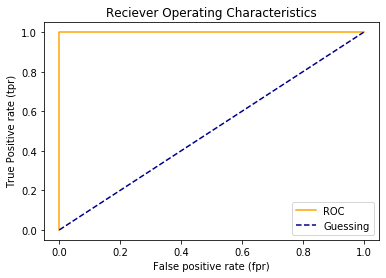

In [172]:
# plot perfect ROC curve and AUC score
fpr,tpr,tresholds = roc_curve(y_test,y_test)

plot_roc_curve(fpr,tpr)

In [174]:
# perfect auc score
roc_auc_score(y_test,y_test)

1.0

#### Confusion Matrix 
A confusion matrix is a quick way to compare the labels a model predicts and the actual label it was supposed to predict

In essence, giving you an idea of where the model is getting confused.

In [175]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(x_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [176]:
# visualize confusion matrix with pd.crosstab
pd.crosstab(y_test,y_preds,
           rownames=["Actual Labels"],
           colnames=["predicted Labels"])

predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


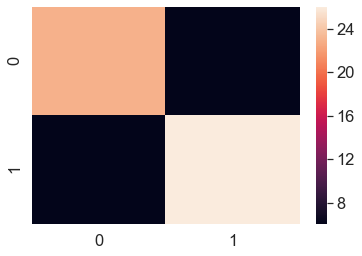

In [178]:
# make our confusion matrix more visual with Seaborn's heatmap()

import seaborn as sns
# set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

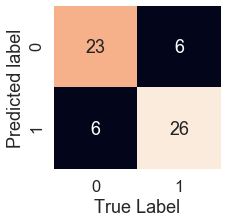

In [183]:
def plot_conf_mat(conf_mat):
        # plot the confusion matrix using seaborn
        fig,ax=plt.subplots(figsize=(3,3))
        ax=sns.heatmap(conf_mat,annot=True,cbar=False)
        plt.xlabel("True Label")
        plt.ylabel("Predicted label")

plot_conf_mat(conf_mat)

# shifiting the curve up and down
"""
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
""";

#### Classification Report

In [185]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [194]:
# where precision and recall become valuable
disease_true=np.zeros(1000)
disease_true[0]=1 # only one positive case

disease_preds=np.zeros(1000)
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))


,0.0,1.0,accuracy,macro avg,weighted avg
f1-score,0.9995,0.0,0.999,0.49975,0.998500
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
support,999.0000,1.0,0.999,1000.00000,1000.000000


#### To summarize Classification metrics:

1. Accuracy is a good measure to start with if all classes are balanced(eg. same amount of samples which are labelled with 0 and 1)
2. Precision and recall become more important when classes are imbalanced
3. If false positive predictions are worse than false negatives, aim for higher precision.
4. If false negative predictions are worse than false positive, aim for higher recall.
5. F1-score is a combination of precision and recall 

### 4.2.2 Regression model evaluation metrics

1. R^2 (pronunced r-squared) or cofficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

#### R^2
Compare your model prediction to the mean of the targets.Values can range from negative infinity(a very poor model) to 1. for example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. and if your model perfectly predicts a range it's R^2 value would be 1.


In [201]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

x= boston_df.drop("target",axis=1)
y= boston_df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)
# R^2 is the default metrics for regression model

0.873969014117403

In [202]:
from sklearn.metrics import r2_score
# fill an array with y_test mean
y_test_mean=np.full(len(y_test),y_test.mean())

In [203]:
y_test.mean()

21.488235294117654

In [212]:
r2_score(y_test,y_test_mean)

2.220446049250313e-16

In [213]:
r2_score(y_test,y_test)


1.0

#### Mean absolute error (MAE)
MAE is the average of the absolute difference between predictions and actual values. It gives you an idea of how wrong your model predictions are.

In [214]:
# mean absolute error 
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae

2.1226372549019623

In [220]:
df=pd.DataFrame(data={"actual values":y_test,
                     "predicted values":y_preds})
df["Differences"]=df["predicted values"]-df["actual values"]
df.head()

,actual values,predicted values,Differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753


#### Mean Square Error (MSE)

In [222]:
# Mean Square error
from sklearn.metrics import mean_squared_error
y_preds=model.predict(x_test)
mae=mean_squared_error(y_test,y_preds)
mae

9.242328990196082

In [225]:
# calculate mse by hand
square=np.square(df["Differences"])
square.mean()

9.24232899019608

In [229]:
from sklearn.model_selection import cross_val_score
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# make the data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# instantiate RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
# fit the model to the data (training machine learning model) cross-validation
cv_acc=cross_val_score(clf,x,y,cv=5,scoring =None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [230]:
print(f'The Cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The Cross-validated accuracy is: 82.48%


In [231]:
# Precision
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [232]:
# Recall
cv_recall = cross_val_score(clf,x,y,cv=5,scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [236]:
# f1 Score
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
np.mean(cv_f1)

0.841476533416832

### How about our regression model?

In [239]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=boston_df.drop("target",axis=1)
y=boston_df["target"]

model=RandomForestRegressor(n_estimators=100)

In [242]:
np.random.seed(42)
cv_r2=cross_val_score(model,x,y,cv=5,scoring=None)
np.mean(cv_r2)


0.622375083951403

In [243]:
np.random.seed(42)
cv_r2=cross_val_score(model,x,y,cv=5,scoring='r2')
np.mean(cv_r2)

0.622375083951403

In [244]:
# Mean abolute error
cv_mae=cross_val_score(model,x,y,cv=5,scoring="neg_mean_absolute_error")
cv_mae

array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069])

In [246]:
# Mean squared error
cv_mse=cross_val_score(model,x,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.02253826604542

### 4.3 Evaluation using metrics Fucntions

classification evaluation functions

In [250]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed()

x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)

clf.fit(x_train,y_train)

# Make some predictions
y_preds=clf.predict(x_test)

# Evaluate the classifier
print("Classifier metics on the test set")
print(f'Accuracy:{accuracy_score(y_test,y_preds)*100:.2f}%')
print(f'Precision:{precision_score(y_test,y_preds)}')
print(f'Recall:{recall_score(y_test,y_preds)}')
print(f'F1:{f1_score(y_test,y_preds)}')
      
      

Classifier metics on the test set
Accuracy:85.25%
Precision:0.8571428571428571
Recall:0.8823529411764706
F1:0.8695652173913043


### Regression evaluation functions

In [258]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
x=boston_df.drop("target",axis=1)
y=boston_df["target"]

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

# Make prediction using our regression model
y_preds=model.predict(x_test)

# Evaluate the regression model 
print("Regression model metrics on the test set ")
print(f'R^2:{r2_score(y_test,y_preds)}')
print(f"MAE:{mean_absolute_error(y_test,y_preds)}")
print(f"MSE:{mean_squared_error(y_test,y_preds)}")




Regression model metrics on the test set 
R^2:0.8739690141174031
MAE:2.1226372549019623
MSE:9.242328990196082


In [259]:
 what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 ' 1. Getting the data ready',
 ' 2. Choose the right estimator/algorithm for our problems',
 ' 3. Fit the model/algorithm and use it to make predictions on our data',
 ' 4. Evaluating a model.',
 ' 5. Improve a model',
 ' 6. Save and load a trained model',
 ' 7. Putting it all together!']

### 5. Improve the model 

first prediction = baseline predictions
first model= baseline model.

From a data perspective:
 1. could we collect more data? (generally, the more data, the better
 2. could we improve our data?
 
From a model perspective:
 1. Is there a better model we could use?
 2. Could we improve the current model?
 
 #### Hyperparameter vs parameter
 
 Parameters = model find these patterns in data
 HyperParameters= settings on a model you can adjust to (potentially) improve it's ability to find patterns.
 
 ##### Three ways to adjust hyperparameters:
  1. By hand
  2. Randomly with RandomSearchCV
  3. Exhaustively with GridSearchCV
 

In [261]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()


In [262]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning the Hyperparameters by hand
 Let's make 3 sets, training, validation and test.

In [265]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### we are going to try and adjust:
1. max_depth
2. max_features
3. min_samples_leaf
4. min_samples_split
5. n_estimators

In [282]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                 "precision": round(precision,2),
                 "recall":round(recall,2),
                 "f1":round(f1,2)}
    print(f"Accuracy:{accuracy*100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 score:{f1:.2f}")
    
    return metric_dict
    
                 

In [288]:
from  sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into x and y
x= heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# split the data into train, validation and test sets.

train_split= round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split=round(train_split+0.15*len(heart_disease_shuffled)) # 15% of data

x_train,y_train=x[:train_split],y[:train_split]
x_valid,y_valid=x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test=x[valid_split:],y[valid_split:]

clf=RandomForestClassifier()
clf.fit(x_train,y_train)

# make baseline predictions
y_preds=clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics= evaluate_preds(y_valid,y_preds)
baseline_metrics

Accuracy:71.11%
Precision:0.72
Recall:0.62
F1 score:0.67


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'accuracy': 0.71, 'precision': 0.72, 'recall': 0.62, 'f1': 0.67}

In [286]:
# create a second classifier with different hyperparameters
np.random.seed(42)
clf2=RandomForestClassifier(n_estimators=100)
clf2.fit(x_train,y_train)

# make predictions with different hyperparameters
y_preds_2=clf2.predict(x_valid)

# Evaluate the 2nd classifier
clf2_metrics=evaluate_preds(y_valid,y_preds_2)
clf2_metrics

Accuracy:80.00%
Precision:0.75
Recall:0.86
F1 score:0.80


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

In [298]:
clf3=RandomForestClassifier(n_estimators=100,max_depth=10)
clf3.fit(x_train,y_train)
y_preds=clf3.predict(x_valid)
clf3_metrics=evaluate_preds(y_valid,y_preds)
clf3_metrics

Accuracy:73.33%
Precision:0.70
Recall:0.76
F1 score:0.73


{'accuracy': 0.73, 'precision': 0.7, 'recall': 0.76, 'f1': 0.73}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [305]:
from sklearn.model_selection import RandomizedSearchCV 

grid={"n_estimators":[10,100,200,500,1000,1200],
     "max_depth":[None,5,10,20,30],
     "max_features":["auto","sqrt"],
     "min_samples_split":[2,4,6],
     "min_samples_leaf":[1,2,4]}

np.random.seed(42)
# split into x and y
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# Split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,
                         param_distributions=grid,
                         n_iter=10, #number of models to try
                         cv=5,
                         verbose=2)
# fit the RandomizedSearchCV version clf
rs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=1000, min_samples_split=4, min_s

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.8s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.8s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.9s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.8s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, m

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_lea

[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.8s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.5s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.5s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.5s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.5s
[CV] n_estimators=1200, min_samples_split=2

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.2s


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.9min finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [309]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [308]:
# make predictions with best hyperparameters
rs_y_preds=rs_clf.predict(x_test)

# Evaluate the predictions
rs_metrics=evaluate_preds(y_test,rs_y_preds)

Accuracy:78.69%
Precision:0.82
Recall:0.79
F1 score:0.81


#### 5.3 Hyperparameter tuning with GridSearchCV

In [310]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [312]:
# how Hyperparameter tuning with GridSeachCV work
# Basically it tries 
6*5*2*3*3*5
# it is a very big calculation so, we will reduce some value

2700

In [313]:
grid_2={'n_estimators': [100, 200, 500],
        'max_depth': [ 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [ 6],
        'min_samples_leaf': [1, 2]}

In [314]:
3*2*2*1*2*5

120

In [316]:
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(42)

# split into x and y
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# Split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf=GridSearchCV(estimator=clf,
                         param_grid=grid_2,
                         cv=5,
                         verbose=2)
# fit the GridSearchCV version clf
gs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=30, max_features=auto, min_samples_le

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   50.7s finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [317]:
gs_clf.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

In [321]:
gs_y_preds= gs_clf.predict(x_test)

# evaluate the predictions
gs_metrics=evaluate_preds(y_test,gs_y_preds)
gs_metrics

Accuracy:78.69%
Precision:0.82
Recall:0.79
F1 score:0.81


{'accuracy': 0.79, 'precision': 0.82, 'recall': 0.79, 'f1': 0.81}

In [337]:
# comparing all three hyperparameter tuning
compare_metrics=pd.DataFrame({"by hand":baseline_metrics,
                 " by RandomizedSearchCV":rs_metrics,
                 " by GridSearchCV":gs_metrics})
compare_metrics

,by hand,by RandomizedSearchCV,by GridSearchCV
accuracy,0.71,0.79,0.79
f1,0.67,0.81,0.81
precision,0.72,0.82,0.82
recall,0.62,0.79,0.79


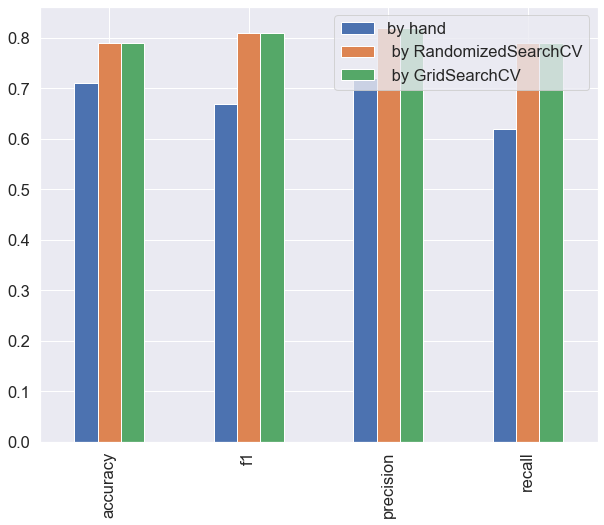

In [339]:
compare_metrics.plot.bar(figsize=(10,8))

### Correlational Analysis
when one column is depends on the another columns than this case we can remove 
that attribute because it does'not make any change while training the data.

##### Forward/Backward Attribute Selection.
it is used to reduce the data.

In [341]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 ' 1. Getting the data ready',
 ' 2. Choose the right estimator/algorithm for our problems',
 ' 3. Fit the model/algorithm and use it to make predictions on our data',
 ' 4. Evaluating a model.',
 ' 5. Improve a model',
 ' 6. Save and load a trained model',
 ' 7. Putting it all together!']

### Save and load a trained machine learning models

Two ways to save and load machine learning models:;
1. with python's pickle module
2. with the joblib module

##### Pickle


In [344]:
import pickle

# save an existing model to file
pickle.dump(gs_clf,open("gs_random_forest_model.pkl","wb"))

In [345]:
# Load a saved model
loaded_pickle_model=pickle.load(open("gs_random_forest_model.pkl","rb"))

In [347]:
# Make some predictions
pickle_y_preds=loaded_pickle_model.predict(x_test)
evaluate_preds(y_test,pickle_y_preds)

Accuracy:78.69%
Precision:0.82
Recall:0.79
F1 score:0.81


{'accuracy': 0.79, 'precision': 0.82, 'recall': 0.79, 'f1': 0.81}

#### Joblib

In [348]:
from joblib import dump,load

# save model to file
dump(gs_clf,filename=" gs_random_forest_model1.joblib")

[' gs_random_forest_model1.joblib']

In [350]:
# load a joblib model
loaded_job_model=load(filename=" gs_random_forest_model1.joblib")

In [353]:
# make and evaluate joblib prediction
joblib_preds=loaded_job_model.predict(x_test)

evaluate_preds(y_test,joblib_preds)


Accuracy:78.69%
Precision:0.82
Recall:0.79
F1 score:0.81


{'accuracy': 0.79, 'precision': 0.82, 'recall': 0.79, 'f1': 0.81}

### Putting it all together 

In [358]:
data=pd.read_csv("car-sales-missing.csv")
len(data)
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [359]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [360]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

steps we want to do (all in one cell):
    1. fill the missing data
    2. Convert data to number
    3. Build a model on the data

In [373]:
# getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

# Setup random seed
import numpy as np 
np.random.seed(42)

# Import data and drop rows with the missing labels
data=pd.read_csv("car-sales-missing.csv")
data.dropna(subset=["Price"],inplace=True)

# Define differnet feature and transformer pipeline
categorical_feature=["Make","Colour"]
categorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))])
door_feature=["Doors"]
door_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))
])

numeric_feature=["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps ( fill missing value and convert into number)
preprocessor=ColumnTransformer(transformers=[
    ("cat",categorical_transformer,categorical_feature),
    ("door",door_transformer,door_feature),
    ("num",numeric_transformer,numeric_feature)
])

# Create a preprocessing and modelling pipeline
model=Pipeline(steps=[("preprocessor",preprocessor),("model",RandomForestRegressor(n_estimators=100))])

# Split the data 
x=data.drop("Price",axis=1)
y=data["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# fit and score the model

model.fit(x_train,y_train);
model.score(x_test,y_test)


0.22188417408787875

It's is possible to use GridSearchCV or RandomizedSearchCV with our pipeline


In [377]:
from sklearn.model_selection import GridSearchCV

pipe_grid={
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2,4]
}

gs_model=GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.8s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.9s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.4s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.6s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, mod

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                    

In [378]:
gs_model.score(x_test,y_test)

0.3339554263158365

In [379]:
what_were_covering 

['0. An end-to-end Scikit-Learn workflow',
 ' 1. Getting the data ready',
 ' 2. Choose the right estimator/algorithm for our problems',
 ' 3. Fit the model/algorithm and use it to make predictions on our data',
 ' 4. Evaluating a model.',
 ' 5. Improve a model',
 ' 6. Save and load a trained model',
 ' 7. Putting it all together!']